In [5]:
import tensorflow as tf

In [6]:
from tensorflow.examples.tutorials.mnist import input_data

In [7]:
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [8]:
mnist

Datasets(train=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f55e205a2e8>, validation=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f55e205a400>, test=<tensorflow.contrib.learn.python.learn.datasets.mnist.DataSet object at 0x7f55e205a518>)

In [9]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [10]:
mnist.train.images.shape

(55000, 784)

In [11]:
mnist.test.images.shape

(10000, 784)

In [12]:
image1 = mnist.train.images[34001].reshape(28,28)

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

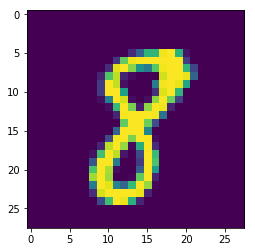

In [14]:
plt.imshow(image1)

In [15]:
learning_rate = 0.001
training_epoch = 15
batch_size = 100

In [16]:
n_classes = 10
n_samples = mnist.train.num_examples
n_samples

55000

In [17]:
n_samples=mnist.train.images.shape[0]
n_samples

55000

In [18]:
n_inputs = mnist.train.images.shape[1]
n_inputs

784

In [19]:
n_hidden_layer1 = 256
n_hidden_layer2 = 256

In [20]:
def multilayer_perceptron(x,weights,biases):
  '''
  x:placeholder of data input
  weights : dictionay of weights
  heights : ictionary of heights
  '''
  # First hidden layer with relu activation
  # X * W + B
  
  layer_1 = tf.add(tf.matmul(x,weights['w1']),biases['b1'])
  
  # relu(X *W +B)
  layer_1 = tf.nn.relu(layer_1)
  
  # Second hidden layer with relu function
  
  layer_2 = tf.add(tf.matmul(layer_1,weights['w2']),biases['b2'])
  layer_2 = tf.nn.relu(layer_2)
  
  # output layer
  
  out_layer = tf.matmul(layer_2,weights['out']) + biases['out']
  
  return out_layer

In [21]:
norm = tf.random_normal([2,3])
norm
sess=tf.Session()
sess.run(norm)

array([[ 1.0552455, -1.2835742,  1.4927057],
       [-0.6048603, -0.6940077,  1.4741043]], dtype=float32)

In [22]:
weights={
    'w1':tf.Variable(tf.random_normal([n_inputs,n_hidden_layer1])),
    'w2':tf.Variable(tf.random_normal([n_hidden_layer1,n_hidden_layer2])),
    'out':tf.Variable(tf.random_normal([n_hidden_layer2,n_classes]))
    
}

In [23]:
biases={
    'b1':tf.Variable(tf.random_normal([n_hidden_layer1])),
    'b2':tf.Variable(tf.random_normal([n_hidden_layer2])),
    'out':tf.Variable(tf.random_normal([n_classes]))
    
}

In [24]:
x = tf.placeholder('float',[None,n_inputs])
y = tf.placeholder('float',[None,n_classes])

In [25]:
pred = multilayer_perceptron(x,weights,biases)
pred

<tf.Tensor 'add_2:0' shape=(?, 10) dtype=float32>

In [26]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [27]:
sess = tf.InteractiveSession()
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [28]:
sess.run(init)

In [29]:
a,b=mnist.train.next_batch(100)
print(a)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [31]:
for epoch in range(training_epoch):
  # cost
  avg_cost = 0.0
  total_batch = int(n_samples/batch_size)
  for i in range(total_batch):
    batch_x,batch_y = mnist.train.next_batch(batch_size)
    _,c = sess.run([optimizer,cost],feed_dict={x:batch_x,y:batch_y})
    avg_cost += c/total_batch
  print("Epoch: {} cost{:.4f} ".format(epoch+1,avg_cost))
print("Model has completed {} Epochs of training ".format(training_epoch))  
  

Epoch: 1 cost0.0277 
Epoch: 2 cost0.0418 
Epoch: 3 cost0.0466 
Epoch: 4 cost0.0265 
Epoch: 5 cost0.0428 
Epoch: 6 cost0.0255 
Epoch: 7 cost0.0122 
Epoch: 8 cost0.0156 
Epoch: 9 cost0.0188 
Epoch: 10 cost0.0263 
Epoch: 11 cost0.0330 
Epoch: 12 cost0.0204 
Epoch: 13 cost0.0167 
Epoch: 14 cost0.0117 
Epoch: 15 cost0.0283 
Model has completed 15 Epochs of training 


In [32]:
correct_prediction = tf.equal(tf.argmax(pred,1),tf.argmax(y,1))
correct_prediction

<tf.Tensor 'Equal:0' shape=(?,) dtype=bool>

In [33]:
correct_prediction = tf.cast(correct_prediction,'float')

In [34]:
correct_prediction[2]

<tf.Tensor 'strided_slice:0' shape=() dtype=float32>

In [35]:
accuracy = tf.reduce_mean(correct_prediction)
accuracy

<tf.Tensor 'Mean_1:0' shape=() dtype=float32>

In [36]:
mnist.test.labels[11]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])

In [37]:
accuracy.eval({x:mnist.test.images,y:mnist.test.labels})

0.9456